# 서울시 구별 CCTV / 인구 분석

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

In [6]:
df  = pd.read_csv('../02.Pandas/project/cctv_pop.csv', index_col='구별')
df.head(3)

,CCTV댓수,최근증가율(%),인구수,내국인,외국인,고령자,외국인비율(%),고령자비율(%)
구별,,,,,,,,
종로구,1715,20,153789,144683,9106,27818,2,8
중구,2447,78,131787,122499,9288,24392,3,8
용산구,2611,78,237285,222953,14332,39070,2,7


- 상관관계 분석
    - cctv 댓수 vs 인구수, 외국인 비율, 고령자 비율

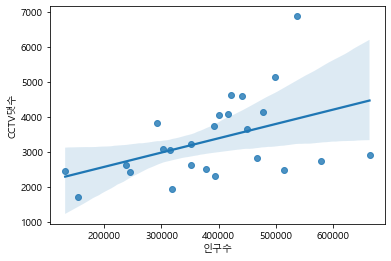

In [10]:
# cctv 댓수 vs 인구수
sns.regplot(x='인구수', y= 'CCTV댓수',data=df)
plt.show()

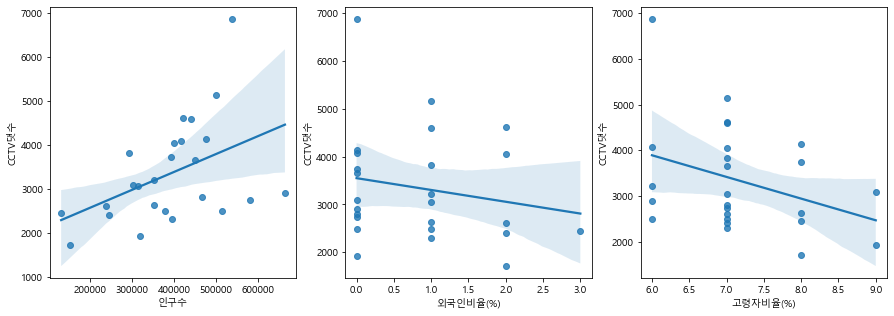

In [12]:
_, axs = plt.subplots(1, 3, figsize=(15,5))
features = ['인구수','외국인비율(%)','고령자비율(%)']
for i, feature in enumerate(features):
    sns.regplot(x=feature, y='CCTV댓수', data=df, ax=axs[i])

- 구별 CCTV 댓수 시각화

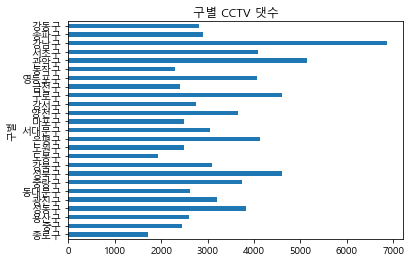

In [13]:
df.CCTV댓수.plot(kind='barh')
plt.title('구별 CCTV 댓수')
plt.show()

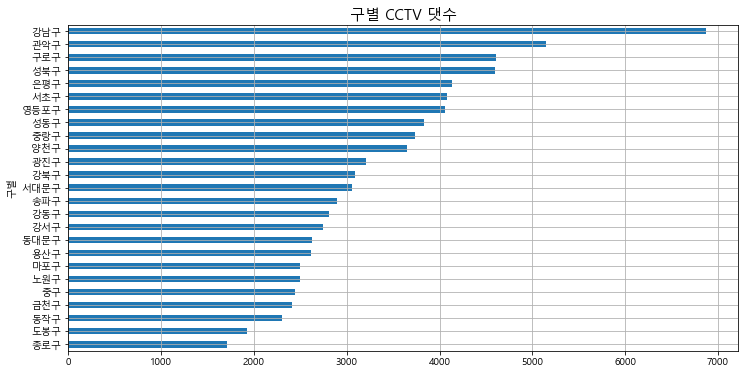

In [14]:
df.CCTV댓수.sort_values().plot(kind='barh', grid=True,figsize=(12,6))
plt.title('구별 CCTV 댓수',fontsize=15)
plt.show()

- 인구대비 cctv 비율 시각화

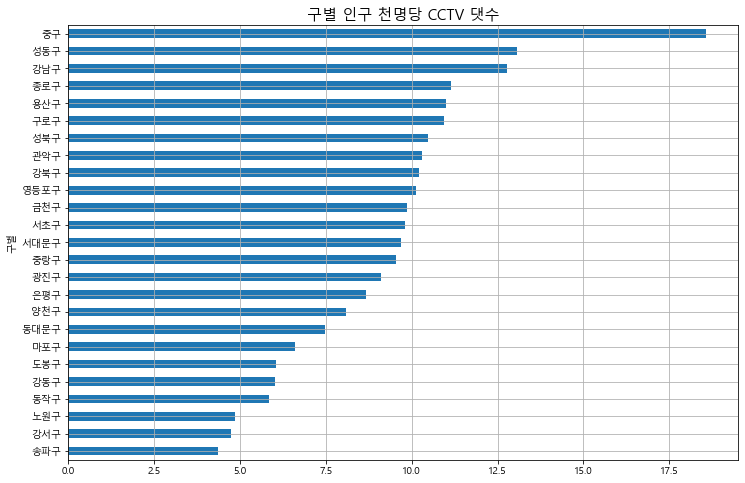

In [17]:
# 천명당 cctv 댓수
df['CCTV비율']= (df.CCTV댓수 / (df.인구수 / 1000)).round(2)
df.CCTV비율.sort_values().plot(kind='barh', grid=True, figsize=(12,8)) 
plt.title('구별 인구 천명당 CCTV 댓수',fontsize= 15) 
plt.show()

### 인구수와 cctv 댓수 분석
- 산점도(Scatter plot)

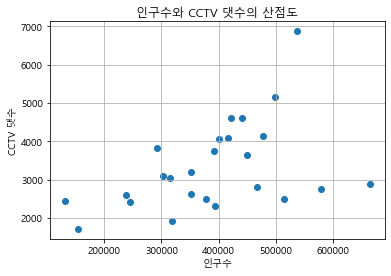

In [19]:
plt.scatter(x=df.인구수, y=df.CCTV댓수)
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수')
plt.ylabel('CCTV 댓수')
plt.grid()
plt.show()

- 회귀선

In [20]:
weight, bias = np.polyfit(df.인구수, df.CCTV댓수, 1)  # x,y,1차식
weight, bias

(0.004085429243410675, 1751.246023182564)

In [21]:
x=np.array([100000,700000])
y = weight * x + bias
y

array([2159.78894752, 4611.04649357])

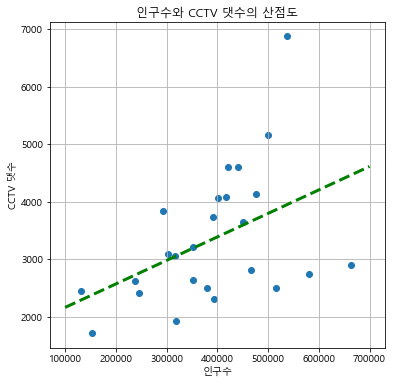

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(x=df.인구수, y=df.CCTV댓수)
plt.plot(x,y, 'g--', lw=3)          # g 는 green  ,  -- 는 dashed
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수')
plt.ylabel('CCTV 댓수')
plt.grid()
plt.show()

- 회귀선과 산점도 사이의 오차

In [25]:
df['오차']= abs(df.CCTV댓수 - (df.인구수*weight + bias)).round(2)
df_sort = df.sort_values(by='오차', ascending=False)
df_sort.head(10)

,CCTV댓수,최근증가율(%),인구수,내국인,외국인,고령자,외국인비율(%),고령자비율(%),CCTV비율,오차
구별,,,,,,,,,,
강남구,6871,63,537800,533042,4758,78226,0,6,12.78,2922.61
송파구,2897,204,663965,658338,5627,97691,0,6,4.36,1566.83
강서구,2744,79,579768,574315,5453,92558,0,7,4.73,1375.85
노원구,2492,68,514946,510956,3990,88345,0,7,4.84,1363.02
관악구,5149,48,499449,485699,13750,79871,1,7,10.31,1357.29
구로구,4608,48,421163,396754,24409,72611,2,7,10.94,1136.12
도봉구,1930,85,319373,317366,2007,64160,0,9,6.04,1126.02
동작구,2306,83,394364,385483,8881,66613,1,7,5.85,1056.39
성북구,4602,77,440142,430528,9614,74709,1,7,10.46,1052.58


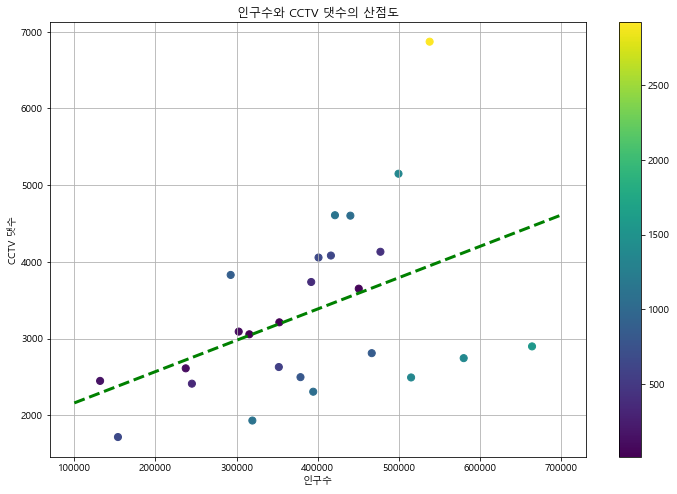

In [28]:
plt.figure(figsize=(12,8))
plt.scatter(x=df.인구수, y=df.CCTV댓수 , c=df.오차, s=50)
plt.plot(x,y, 'g--', lw=3)          # g 는 green  ,  -- 는 dashed
plt.title('인구수와 CCTV 댓수의 산점도')
plt.xlabel('인구수')
plt.ylabel('CCTV 댓수')
plt.colorbar()
plt.grid()
plt.show()

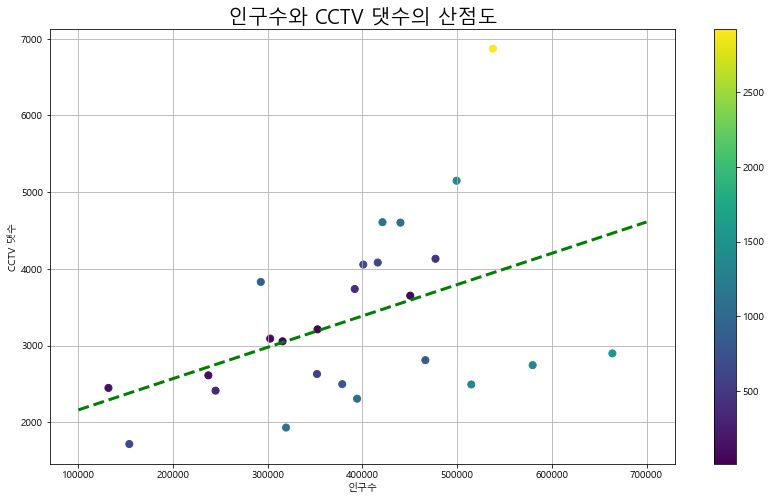

In [29]:
plt.figure(figsize=(14,8))
plt.scatter(x=df.인구수, y=df.CCTV댓수 , c=df.오차, s=50)
plt.plot(x,y, 'g--', lw=3)          # g 는 green  ,  -- 는 dashed
plt.title('인구수와 CCTV 댓수의 산점도',fontsize=20)
plt.xlabel('인구수')
plt.ylabel('CCTV 댓수')
plt.colorbar()
plt.grid()
plt.show()

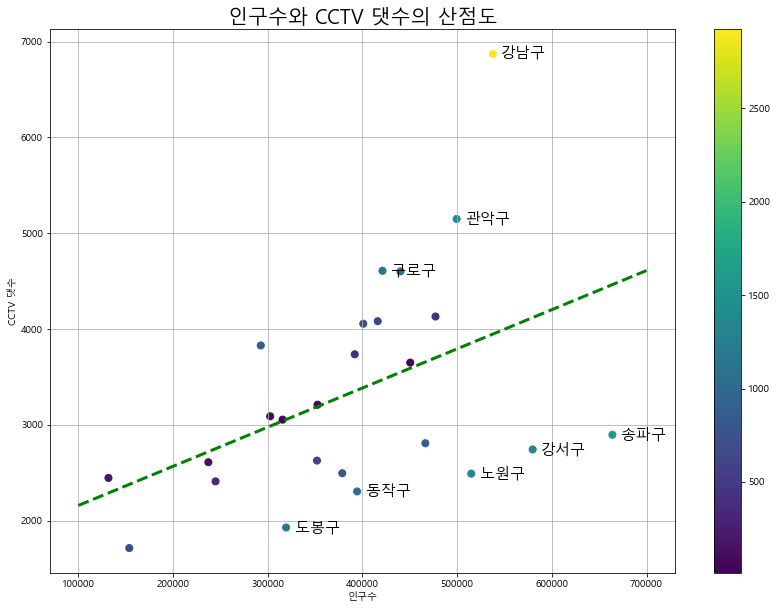

In [33]:
plt.figure(figsize=(14,10))
plt.scatter(x=df.인구수, y=df.CCTV댓수 , c=df.오차, s=50)
plt.plot(x,y, 'g--', lw=3)          # g 는 green  ,  -- 는 dashed
for i in range(8):
    plt.text(df_sort.인구수[i]+9000, df_sort.CCTV댓수[i]-50,
             df_sort.index[i], fontsize=15)
plt.title('인구수와 CCTV 댓수의 산점도',fontsize=20)
plt.xlabel('인구수')
plt.ylabel('CCTV 댓수')
plt.colorbar()
plt.grid()
plt.show()